<a href="https://colab.research.google.com/github/nubialmeida/projeto-pandas/blob/main/Alesp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 12.0 MB/s eta 0:00:00


In [3]:
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.5/148.5 KB 11.7 MB/s eta 0:00:00


In [2]:
!pip install unidecode #biblioteca que remove caracteres especies e transforma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 17.7 MB/s eta 0:00:00


##Declaração das LIBS

In [98]:
from unidecode import unidecode

In [56]:
import pandas as pd
import numpy as np
import os
from google.cloud import storage
import pandera as pa

##Conector MongoDB Atlas

In [ ]:
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
Client = MongoClient(uri,tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

##Conector para Cloud Storage(bucket)

In [6]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto) conector

serviceAccount = '/content/drive/MyDrive/chave/colab.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [7]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('nubialmeida45')
bucket.blob('depsp.csv')
path = 'gs://nubialmeida45/brutos/depsp.csv'

##Extração dos dados(Extract)

In [106]:
df = pd.read_csv(path,sep=',')

<ipython-input-106-54e649ef8e23>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,sep=',')


##Pré Análise

In [107]:
df

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
542390,2007,300441,3,120.00,6306675000140.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
542391,2007,300441,3,2096.80,52204617000122.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
542392,2007,300441,3,13.48,62925474000282.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
542393,2007,300441,3,38.08,66747577000170.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [47]:
df.dtypes #Verificando os tipos

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

##Tranformações (Limpeza, conversão , etc)

In [45]:
df['CNPJ'].values[542394] #Verificando o formato de CNPJ antes e depois do replace abaixo, estava com .'

'70470000001960'

In [34]:
df['CNPJ'] = df['CNPJ'].str.replace('.', '') #Removendo .' 

<ipython-input-34-56d2aeaae6c5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['CNPJ'] = df['CNPJ'].str.replace('.', '')


In [37]:
df.CNPJ = df.CNPJ.str.replace('O','0') #Substituindo o O por 0

In [71]:
df.CNPJ = df.CNPJ.replace('na',pd.NA) #Substituindo o O por 0

In [72]:
df.isna().sum() #Verificando os nulos

Ano           0
Matricula     0
Mes           0
Valor         0
CNPJ          0
Deputado      0
Tipo          0
Fornecedor    0
dtype: int64

In [ ]:
df.isna().head()#Procurando nulos

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


##GroupBY ( Agrupamentos)

In [109]:
#Filtro dos últimos dois anos
dfiltro = df[df['Ano'].isin([2021, 2022])]

In [110]:
dfiltro.groupby(['Deputado'])['Valor'].sum().sort_values(ascending=False)#Descobrindo os gastos por deputado

Deputado
VINICIUS CAMARINHA             915425.00
AGENTE FEDERAL DANILO BALAS    876599.27
MARTA COSTA                    868615.42
PAULO FIORILO                  852768.54
MARCIO NAKASHIMA               852548.86
                                 ...    
AFONSO LOBATO                   68000.04
RAUL MARCELO                    36955.72
DANIEL JOSE                     33966.40
CAUE MACRIS                     30066.56
JANAINA PASCHOAL                10451.84
Name: Valor, Length: 97, dtype: float64

In [75]:
df.groupby('Ano')['Valor'].sum() #Mostrando o total gasto por ano

Ano
2002    11122821.42
2003    15834964.24
2004    17248832.18
2005    18151570.81
2006    18397375.96
2007    18390011.24
2008    17808751.18
2009    19692011.71
2010    18361598.00
2011    18666881.69
2012    19250086.55
2013    21996182.92
2014    19793197.11
2015    20847302.59
2016    22844787.47
2017    23408256.71
2018    21805727.79
2019    19439783.14
2020    16949849.75
2021    21751097.61
2022    26042714.48
2023     2039211.73
Name: Valor, dtype: float64

In [108]:
#Verificando e corrigindo possíveis inconsistências nos dados que podem ser (Nomes diferentes para o mesmo item, ex: TÁXI e taxi ) 
df['Deputado']=df['Deputado'].apply(str.upper).apply(unidecode)
df['Tipo']=df['Tipo'].apply(str.upper).apply(unidecode)
df['Fornecedor']=df['Fornecedor'].apply(str.upper).apply(unidecode)


In [102]:
df = df.drop_duplicates() #dropando duplicados

In [ ]:
correcoes = { #Correção de nomes
    'VIVO':'VIVO S.A.', 
    'TELEFONICA BRASIL S.A':'TELEFONICA BRASIL S.A.', 
    'NEXTEL TELECOMUNICAÇÕES LTDA':'NEXTEL TELECOMUNICAÇÕES LTDA.', 
    'SABESP':'COMPANHIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO - SABESP',
    'TELEFÔNICA BRASIL S.A.':'TELEFONICA BRASIL S.A.',
    'TELEFONICA': 'TELEFONICA BRASIL S.A.',
    'COMPANHIA PAULISTA DE FORÇA E LUZ':'CPFL ENERGIA', 
    'TELEFONICA BRASIL S/A':'TELEFONICA BRASIL S.A.',
    'TELEFONICA BRASIL SA':'TELEFONICA BRASIL S.A.',
    'CLARO S.A.':'CLARO S/A',
    'ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO PAULO S.A.':'ELETROPAULO',
    'ELETROPAULO':'AES ELETROPAULO',
    'CLARO S.A':'CLARO S/A',
    'NEXTEL TELECOMUNICAÇÕES LTDA.':'NEXTEL TELECOMUNICAÇÕES LTDA', 
    'NET':'NET SERVIÇOS DE COMUNICAÇÃO S/A',
    'TELEFÔNICA BRASIL S.A':'TELEFONICA BRASIL S.A.',  
    'KALUNGA':'KALUNGA COM. E IND. GRÁFICA LTDA.',
    'KALUNGA COMERCIO E IND. GRAFICA LTDA':'KALUNGA COM. E IND. GRÁFICA LTDA.',
    'NEXTEL':'NEXTEL TELECOMUNICAÇÕES LTDA',
    'KALUNGA COM. E IND. GRAFICA LTDA':'KALUNGA COM. E IND. GRÁFICA LTDA.', 
    'TELEFÔNICA BRASIL S/A':'TELEFONICA BRASIL S.A.',
    'TELESP CELULAR':'TELESP CELULAR S/A'
}
  
for key, value in correcoes.items():
  df.loc[df.Fornecedor==key,'Fornecedor'] = value

##Plotagem

<Axes: xlabel='ANO', ylabel='Valores gastos'>

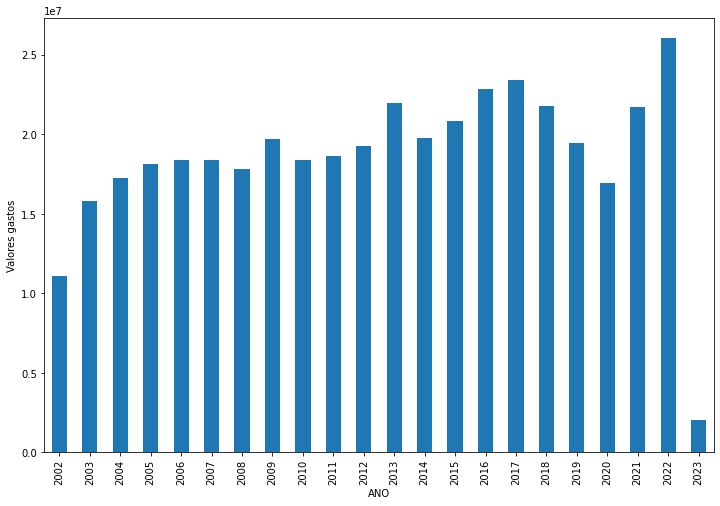

In [86]:
df.groupby('Ano')['Valor'].sum().plot.bar(figsize=(12,8),xlabel='ANO',ylabel='Valores gastos') #Verificando os valores gastos por ano

<Axes: ylabel='ANO'>

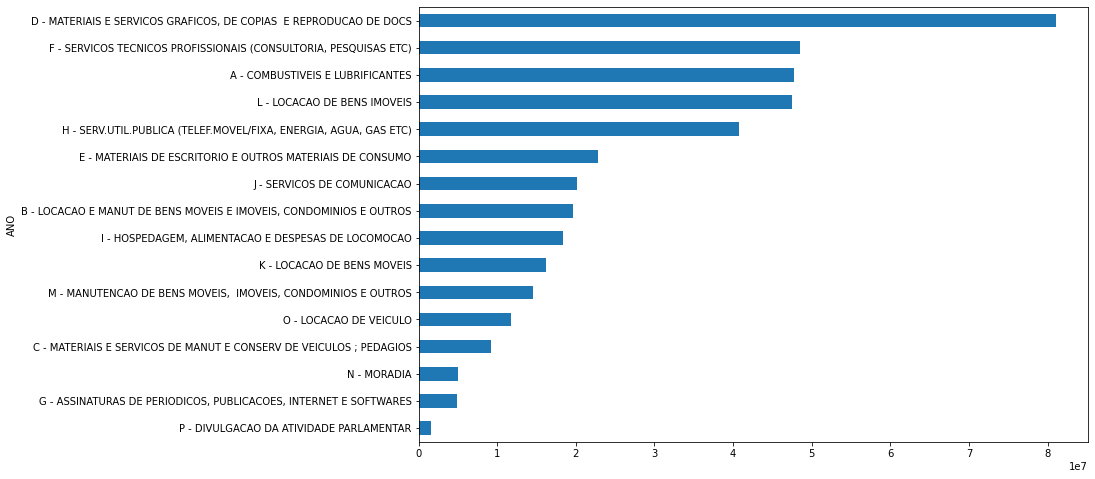

In [114]:
df.groupby('Tipo')['Valor'].sum().sort_values(ascending=True).plot.barh(figsize=(12,8),xlabel='Tipo de Fornecedor',ylabel='Valores gastos')

##Criação do Schema de validação de dados

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'Deputado':pa.Column(pa.String),
        'CNPJ':pa.Column(pa.Int),
        'Mes':pa.Column(pa.Int),
        'Tipo':pa.Column(pa.String),
        'Fornecedor':pa.Column(pa.String),
    }
)

##LOAD (Carregamento) salvar o df

In [ ]:
#Carregar direto no bucket
df.to_csv('gs://nubialmeida45/tratados/alespe_tratado.csv',index=False)

##Considerações finais
